In [3]:
# In Jupyter, the console commands can be executed by the ‘!’ sign before the command within the cell
!pip install mplcursors
!pip install yahoo_fin
!pip install pandas-datareader
import math
import pandas_datareader as web # allows us to create a pandas DataFrame object by using various data sources from the internet. It is popularly used for working with realtime stock price datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

     -------------------------------------- 109.5/109.5 kB 3.1 MB/s eta 0:00:00


In [4]:
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objects as go
import mplcursors as mpl
from yahoo_fin import stock_info as si
import datetime

In [31]:
# today = datetime.datetime.utcnow().date()
# yesterday = today - datetime.timedelta(days = 1)
# df = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2015-01-01', end=yesterday)
# start_date = "2020-01-01"
# end_date = "2020-12-31"
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2018, 1, 1)
# df = web.DataReader('ticker=RGDPUS', 'econdb', start, end) # worked
df = web.DataReader('TSLA', 'stooq', start, end) # Working
print(df)

# fig = px.histogram(df, x=df['Close'])
# fig.show()
dates = []
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['dates'] = dates
df['dates'] 

fig = go.Figure(data = [go.Candlestick( x=df['dates'],
                                        open = df['Open'],
                                        high = df['High'],
                                        low = df['Low'],
                                        close = df['Close'],
                                       )])
fig.show()
#fig = go.Figure(data=[go.Candlestick(open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

               Open     High      Low    Close    Volume
Date                                                    
2017-12-29  21.0787  21.0940  20.6667  20.7567  56567070
2017-12-28  20.7833  21.0547  20.6360  21.0240  64608075
2017-12-27  21.0667  21.1667  20.7167  20.7760  70578090
2017-12-26  21.5887  21.5893  21.1053  21.1527  65549430
2017-12-22  21.9673  22.0613  21.6547  21.6800  63117150
...             ...      ...      ...      ...       ...
2015-01-08  14.1873  14.2533  14.0007  14.0413  51634560
2015-01-07  14.2233  14.3187  13.9853  14.0633  44514750
2015-01-06  14.0040  14.2800  13.6140  14.0853  93924045
2015-01-05  14.3000  14.4333  13.8107  14.0060  80488110
2015-01-02  14.8580  14.8833  14.2173  14.6207  71461545

[755 rows x 5 columns]


In [33]:
si.get_quote_table('TSLA', dict_result = False)
#si.get_live_price('INFY.NS')

,attribute,value
0,1y Target Est,195.99
1,52 Week Range,101.81 - 384.29
2,Ask,0.00 x 1100
3,Avg. Volume,182615823.0
4,Beta (5Y Monthly),2.07
5,Bid,0.00 x 1100
6,Day's Range,188.04 - 197.99
7,EPS (TTM),3.68
8,Earnings Date,"Apr 18, 2023 - Apr 24, 2023"
9,Ex-Dividend Date,NaN


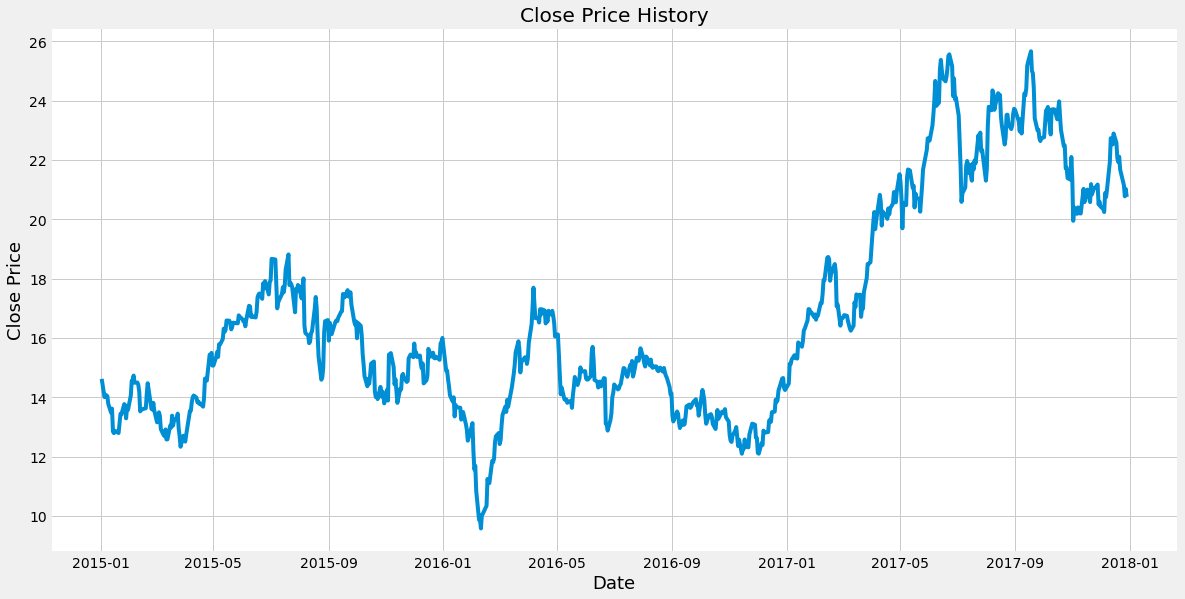

In [35]:
plt.figure(figsize = (18,9))
x = plt.axes()
x.set_facecolor('white')
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.show()

In [37]:
data = df.filter(['Close'])
#si.get_live_price('INFY.NS')
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * (0.8) )
training_data_len

604

In [38]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.69481686],
       [0.711431  ],
       [0.69601646],
       [0.71943041],
       [0.75220496],
       [0.77897531],
       [0.76786813],
       [0.77619696],
       [0.80859858],
       [0.82774245],
       [0.80478845],
       [0.80951227],
       [0.81779758],
       [0.76753871],
       [0.71048003],
       [0.69444393],
       [0.70277275],
       [0.66311759],
       [0.66933313],
       [0.67484011],
       [0.68487199],
       [0.67902938],
       [0.72075432],
       [0.71744143],
       [0.71222038],
       [0.69999441],
       [0.72158099],
       [0.68400181],
       [0.71014439],
       [0.69957796],
       [0.69460553],
       [0.683834  ],
       [0.71159882],
       [0.66017142],
       [0.66017142],
       [0.6656411 ],
       [0.67285113],
       [0.65930125],
       [0.67301895],
       [0.64471959],
       [0.73513087],
       [0.77843455],
       [0.73099132],
       [0.73426069],
       [0.75622642],
       [0.754859  ],
       [0.80250735],
       [0.801

In [39]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0 : training_data_len, :]
# Split the data into x_train and y_train data sets
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

    if( i < 61):
        print(x_train)
        print(y_train)

[array([0.69481686, 0.711431  , 0.69601646, 0.71943041, 0.75220496,
       0.77897531, 0.76786813, 0.77619696, 0.80859858, 0.82774245,
       0.80478845, 0.80951227, 0.81779758, 0.76753871, 0.71048003,
       0.69444393, 0.70277275, 0.66311759, 0.66933313, 0.67484011,
       0.68487199, 0.67902938, 0.72075432, 0.71744143, 0.71222038,
       0.69999441, 0.72158099, 0.68400181, 0.71014439, 0.69957796,
       0.69460553, 0.683834  , 0.71159882, 0.66017142, 0.66017142,
       0.6656411 , 0.67285113, 0.65930125, 0.67301895, 0.64471959,
       0.73513087, 0.77843455, 0.73099132, 0.73426069, 0.75622642,
       0.754859  , 0.80250735, 0.80118344, 0.83466657, 0.86246869,
       0.89495733, 0.87879692, 0.85745275, 0.87805105, 0.87850479,
       0.8740296 , 0.87813186, 0.82571619, 0.88329076, 0.87626719])]
[0.8757264415397144]


In [40]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape 

(544, 60, 1)

In [43]:
# CNN
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [45]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

544/544 [==============================] - 26s 41ms/step - loss: 0.0062


In [46]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , : ]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

In [47]:
x_test = np.array(x_test)

In [48]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)

C:\Users\Kedar\AppData\Local\Temp/ipykernel_3152/1630690628.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



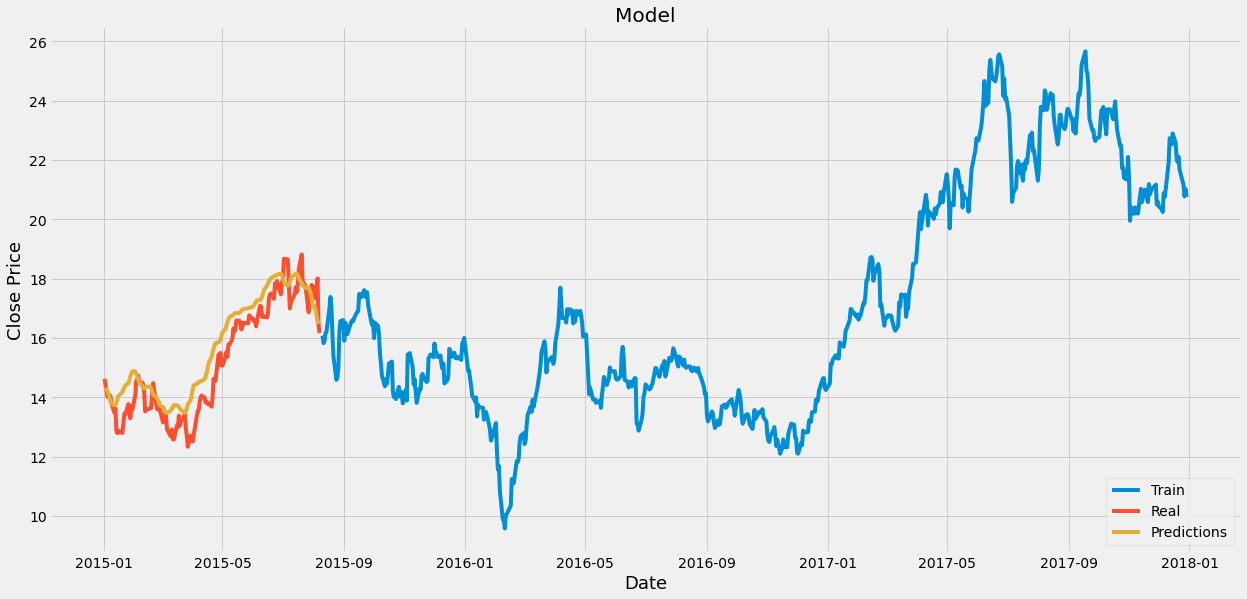

In [53]:
# Plot the data
train = data[: training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize = (19,9))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
a = plt.plot(train['Close'])
b = plt.plot(valid[['Close', 'Predictions']])

mpl.cursor(a)
mpl.cursor(b)
plt.legend(['Train', 'Real', 'Predictions'], loc = 'lower right')
plt.show()